<a href="https://colab.research.google.com/github/neenz16/hello-world/blob/main/CS298_analysis_neenu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
$import pandas as pd
import numpy as np
import re

In [ ]:
# from google.colab import files #from desktop load excel file
# uploaded = files.upload()

In [ ]:
# import io
# df = pd.read_excel(io.BytesIO(uploaded['ResultTable.xlsx']))
# print(df.head(5))

load excel from drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load Excel file from Google Drive folder
file_path = '/content/drive/MyDrive/Colab Notebooks/t9_ResultTable.xlsx'

#read excel data into a dataframe df
df = pd.read_excel(file_path)

# Display the loaded data
print(df.head(5))

    system time                  message  device time  leftGazePointDisplay  \
0  640411983649                        0   3907871536              0.445752   
1  640411990719  START SETUP (both eyes)            0              0.000000   
2  640414939131   STOP SETUP (both eyes)            0              0.000000   
3  640414958655                        0   3910846550              0.471944   
4  640414966989                        0   3910854883                   NaN   

   leftGazePointDisplay.1  leftGazePointCoords  leftGazePointCoords.1  \
0                0.293873           -21.920160             151.448135   
1                0.000000             0.000000               0.000000   
2                0.000000             0.000000               0.000000   
3                0.495030           -12.868136             110.617470   
4                     NaN                  NaN                    NaN   

   leftGazePointCoords.2  leftGazeOriginDisplay  leftGazeOriginDisplay.1  ...  \
0    

In [ ]:
column_names = df.columns
print(column_names)

Index(['system time', 'message', 'device time', 'leftGazePointDisplay',
       'leftGazePointDisplay.1', 'leftGazePointCoords',
       'leftGazePointCoords.1', 'leftGazePointCoords.2',
       'leftGazeOriginDisplay', 'leftGazeOriginDisplay.1',
       'leftGazeOriginDisplay.2', 'leftGazeOriginCoords',
       'leftGazeOriginCoords.1', 'leftGazeOriginCoords.2', 'leftPupilDiameter',
       'rightGazePointDisplay', 'rightGazePointDisplay.1',
       'rightGazePointCoords', 'rightGazePointCoords.1',
       'rightGazePointCoords.2', 'rightGazeOriginDisplay',
       'rightGazeOriginDisplay.1', 'rightGazeOriginDisplay.2',
       'rightGazeOriginCoords', 'rightGazeOriginCoords.1',
       'rightGazeOriginCoords.2', 'rightPupilDiameter'],
      dtype='object')


## **Initial Clean up code for subject<>.xlxs
**
Run raw converted suject .mat ecxel file thru below cleaning code to take off empty message rows and unwanted columns

In [ ]:


#take result test table (subject raw .mat to excel file) as input and save new cleaned excel with no empty and 0 message rows and take off unwanted columns
# Initialize an empty DataFrame to store the filtered rows
new_df = pd.DataFrame(columns=['system time', 'message', 'device time', 'leftPupilDiameter', 'rightPupilDiameter'])

# Loop through the DataFrame to find rows with 'message' containing 'User Clickeds'
for index, row in df.iterrows():
    message = str(row['message'])
    row_index = index
    # Extract the required columns from the previous row
    prev_row = df.iloc[row_index - 1]

    if (not pd.isnull(message)) and (message.strip() and message.strip() != "0"):
        new_row = {
            'system time': prev_row['system time'],
            'message': row['message'],
            'device time': prev_row['device time'],
            'leftPupilDiameter': prev_row['leftPupilDiameter'],
            'rightPupilDiameter': prev_row['rightPupilDiameter']
        }
        # Append the new row to the new DataFrame
        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)

# Write the new DataFrame to a new Excel file
new_df.to_excel('t9_ResultTable_cleaned.xlsx', index=False)

In [ ]:
new_df.head(5)

,system time,message,device time,leftPupilDiameter,rightPupilDiameter
0,640411983649,START SETUP (both eyes),3907871536,2.564194,2.542679
1,640411990719,STOP SETUP (both eyes),0,0.000000,0.000000
2,640414975321,"START CALIBRATION ROUTINE (both eyes), calibra...",3910863216,NaN,NaN
3,640414976386,POINT ON 1 (2304 160),0,0.000000,0.000000
4,640414987009,POINT READY 1 (2304 160),0,0.000000,0.000000


In [ ]:
!ls

drive  sample_data  t9_ResultTable_cleaned.xlsx


In [ ]:
#############

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Now load cleaned excel files (ResultTest_cleaned.xlsx )to sepparate type 1 and type 2 experiment data to 2 excel files**
*italicized text*

In [ ]:
# # Load Excel file from Google Drive folder
# file_path = '/content/drive/MyDrive/Colab Notebooks/Nada_ResultTable_cleaned.xlsx'

# #read excel data into a dataframe df
# df = pd.read_excel(file_path)

# # Display the loaded data
# # print(df.head(5))

In [ ]:
# df.head(5)

,system time,message,device time,leftPupilDiameter,rightPupilDiameter
0,4842202552268,START SETUP (both eyes),9689815692,2.963043,3.255569
1,4842202556389,STOP SETUP (both eyes),0,0.000000,0.000000
2,4842207010653,"START CALIBRATION (both eyes), calibration no. 1",9694274038,3.020096,3.265457
3,4842207018648,POINT ON 1 (1728 108),0,0.000000,0.000000
4,4842207045081,POINT READY 1 (1728 108),0,0.000000,0.000000


In [ ]:
new_df.head()


,system time,message,device time,leftPupilDiameter,rightPupilDiameter
0,640411983649,START SETUP (both eyes),3907871536,2.564194,2.542679
1,640411990719,STOP SETUP (both eyes),0,0.000000,0.000000
2,640414975321,"START CALIBRATION ROUTINE (both eyes), calibra...",3910863216,NaN,NaN
3,640414976386,POINT ON 1 (2304 160),0,0.000000,0.000000
4,640414987009,POINT READY 1 (2304 160),0,0.000000,0.000000


In [ ]:


#### Works# Separate type 1 and type 2 into 2 excel files#s

# Initialize empty DataFrames to store filtered rows for type 1 and type 2 experiments
new1_df = pd.DataFrame(columns=['system time', 'message', 'device time', 'leftPupilDiameter', 'rightPupilDiameter'])
new2_df = pd.DataFrame(columns=['system time', 'message', 'device time', 'leftPupilDiameter', 'rightPupilDiameter'])

# Initialize a flag to determine whether to append rows to new1_df
append_rows_to_new1 = False
append_rows_to_new2 = False

# Loop through the DataFrame to find and filter rows based on experiment types
for index, row in new_df.iterrows():
    message = str(row['message'])

    # Check if the message contains any of the experiment types
    if 'experiment 1 type 1' in message or 'experiment 2 type 1' in message or 'experiment 3 type 1' in message:
        append_rows_to_new2 = False # Stop appending rows to new2_df
        append_rows_to_new1 = True  # Start appending rows to new1_df
    elif 'experiment 1 type 2' in message or 'experiment 2 type 2' in message or 'experiment 3 type 2' in message:
        append_rows_to_new1 = False # Stop appending rows to new1_df
        append_rows_to_new2 = True # Start appending rows to new2_df

    # # Check if the message has "Block has ended"
    # if "Block has ended" in message:
    #     append_rows_to_new1 = False  # Stop appending rows to new1_df
    #     append_rows_to_new2 = False

    # Append the current row to new1_df if the flag is set
    if append_rows_to_new1:
        new1_df = pd.concat([new1_df, pd.DataFrame([row])], ignore_index=True)
   # Append the current row to new2_df if the flag is set
    if append_rows_to_new2:
        new2_df = pd.concat([new2_df, pd.DataFrame([row])], ignore_index=True)


# Write the filtered DataFrames to new Excel files
new1_df.to_excel('t9_Cleaned1.xlsx', index=False)
new2_df.to_excel('t9_Cleaned2.xlsx', index=False)




Now we have rows sepaated for type 1 and type 2 in Cleaned1.xlsx and Cleaned2.xlsx. Now process them separately to get average pupil size for each experiment type and reaction time RT using total trial time message.


Also use a dictionary counter to keep track of user clicked gabor type and mark HIT or MISS based oj if consecutive same type clicked HIT and if change in type clicked MISS.

In [ ]:
!ls

drive  sample_data  t9_Cleaned1.xlsx  t9_Cleaned2.xlsx	t9_ResultTable_cleaned.xlsx


In [ ]:
# ####Find path to file ######
# import os

# # Get the current working directory
# current_directory = os.getcwd()

# # Specify the filename
# filename = 'new1.xlsx'

# # Join the current directory with the filename to get the full path
# file_path = os.path.join(current_directory, filename)

# # Print the full path
# print("Path to New.xlsx:", file_path)


Path to New.xlsx: /content/new1.xlsx


# ***Upload cleaned1.xlsx and cleaned2.xlsx (for each subject) and calculate HIT , MISS and average pupil dilation and RT for subject for both expmt types.***

> Add blockquote:::)



In [ ]:
# Load Excel file from Google Drive folder
file_path_cleaned = '/content/drive/MyDrive/Colab Notebooks/t9_Cleaned2.xlsx'

#read excel data into a dataframe df
clean_df = pd.read_excel(file_path_cleaned)



In [ ]:
clean_df.head(100)

,system time,message,device time,leftPupilDiameter,rightPupilDiameter
0,640608617859,experiment 1 type 2,4104505841,2.848892,2.857361
1,640608618138,Display Block Title Starts...,0,0.000000,0.000000
2,640608625235,"blockType: Experiment 2.1, blockCounter: 2 ,tr...",0,0.000000,0.000000
3,640615192885,Display Block Title Ends...,4111080874,2.952332,2.948471
4,640615234551,Trial start Trial no. 1:\n,4111122540,2.916077,2.911697
...,...,...,...,...,...
95,640648830681,"Grey cover at X: 159.000, Y: 713.000 on Trial...",0,0.000000,0.000000
96,640648830864,Type: 5\n,0,0.000000,0.000000
97,640649326364,"User Clicked at X: 101.000, Y: 446.000 on Tria...",4145214381,3.182617,3.069275
98,640649330181,User clicked on type 5,0,0.000000,0.000000


HIT or MISS type counter code

In [ ]:
# # Load Excel file from Google Drive folder
# file_path = '/content/drive/MyDrive/Colab Notebooks/excel/t3/UNIQUE_t3_Cleaned2_hitmiss.xlsx'

# #read excel data into a dataframe df
# clean_df = pd.read_excel(file_path)

In [ ]:

#testdata
# data = {'message': ["User clicked on type 1", "User clicked on type 1", "User clicked on type 2","User clicked on type 2","User clicked on type 2",
#                      "User clicked on type 3", "User clicked on type 4",  "User clicked on type 3","User clicked on type 1",
#                      "User clicked on type 5", "User clicked on type 6","User clicked on type 2", "User clicked on type 6"]}
# df = pd.DataFrame(data)

# Initialize variables
consecutive_count = 0
current_type = None
result = []
first_occurrence = {}  # Dictionary to store the first occurrence of each type

# Map types 3 and 4 to the same group, and 5 and 6 to the same group
group_map_dict = {3: 3, 4: 3, 5: 5, 6: 5}

# Iterate through the messages column
for message in clean_df['message']:
    if isinstance(message, str) and "User clicked on type" in message:
        # Extract the type number from the message
      type_num = int(message.split()[-1])
      # print(type_num)

     # Map the type to its corresponding group
      group = group_map_dict.get(type_num, type_num)     #dictionary.get(key, default=None)

      if current_type is None or group == current_type:     #current_type is None -> first occurence , group == current_type -> consecutive occurence check
      # if current_type is None:
          consecutive_count += 1
          current_type = group
          if group not in first_occurrence:
                first_occurrence[group] = True  # Marking the first occurrence of this type
          if consecutive_count >= 1:  # Check if it's the first encounter
              result.append("HIT")
          else:
              result.append("MISS")


      else:       #new type encounter
          consecutive_count = 0
          current_type = group
          if consecutive_count >= 0 and group not in first_occurrence:  # Check if it's the first encounter
              result.append("HIT")
          else:
              result.append("MISS")


    else: #for all other message rows
      result.append("NA")

# Add the result column to the df
clean_df['result'] = result

print(clean_df)



# Write the DataFrame to an Excel file
clean_df.to_excel('t3_Cleaned2_hitmiss.xlsx', index=False)




       system time                                            message  \
0     558148926733                                experiment 1 type 2   
1     558148935066                      Display Block Title Starts...   
2     558148941700  blockType: Experiment 2.1, blockCounter: 2 ,tr...   
3     558154418425                        Display Block Title Ends...   
4     558154451759                       Trial start Trial no. 1:\n     
...            ...                                                ...   
5383  558785629889                       Trial start Trial no. 5:\n     
5384  558785654888               Total user clicks on trial 5 is: 0\n   
5385  558786671560                 Blank screen ends after trial: 5\n   
5386  558786679893  Block has ended. Please be ready for next block.    
5387  558786686894                                          Complete!   

      device time  leftPupilDiameter  rightPupilDiameter result  
0      8129140907           3.613266            3.513916 

In [ ]:
#HIT or MISS added clean_df displayed
clean_df

,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
0,640608617859,experiment 1 type 2,4104505841,2.848892,2.857361,INVALID
1,640608618138,Display Block Title Starts...,0,0.000000,0.000000,INVALID
2,640608625235,"blockType: Experiment 2.1, blockCounter: 2 ,tr...",0,0.000000,0.000000,INVALID
3,640615192885,Display Block Title Ends...,4111080874,2.952332,2.948471,INVALID
4,640615234551,Trial start Trial no. 1:\n,4111122540,2.916077,2.911697,INVALID
...,...,...,...,...,...,...
2541,641309761186,Trial ends trial no: 5,0,0.000000,0.000000,INVALID
2542,641309761527,Blank screen starts after trial: 5,0,0.000000,0.000000,INVALID
2543,641310771227,Blank screen ends after trial: 5\n,4806659429,3.063660,3.012970,INVALID
2544,641310779561,Block has ended. Please be ready for next block.,4806667763,3.038940,3.004837,INVALID


In [ ]:
!ls

drive  sample_data


In [ ]:
# Load Excel file from Google Drive folder
file_path_cleaned = '/content/drive/MyDrive/Colab Notebooks/excel/nada/UNIQUE_Nada_Cleaned2_hitmiss.xlsx'

#read excel data into a dataframe df
hitmiss_df = pd.read_excel(file_path_cleaned)

In [ ]:
hitmiss_df.head(10)

,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
0,4842319420473,experiment 1 type 2,9806682929,3.118515,3.214661,INVALID
1,4842319445474,Display Block Title Starts...,9806707930,3.109482,3.243256,INVALID
2,4842319447647,"blockType: Experiment 2.1, blockCounter: 2 ,tr...",0,0.000000,0.000000,INVALID
3,4842320470490,Display Block Title Ends...,9807732937,2.990631,3.195129,INVALID
4,4842320528825,Trial start Trial no. 1:\n,9807791271,3.008286,3.194107,INVALID
5,4842327578903,"User Clicked at X: 1155.000, Y: 739.000 on Tri...",9814841302,3.126495,3.373352,INVALID
6,4842327578921,User clicked on type 3,0,0.000000,0.000000,HIT
7,4842327579539,"Grey cover at X: 1155.000, Y: 733.000 on Tria...",0,0.000000,0.000000,INVALID
8,4842327580128,Type: 3\n,0,0.000000,0.000000,INVALID
9,4842328520581,"User Clicked at X: 1148.000, Y: 317.000 on Tri...",9815782972,3.114609,3.311325,INVALID


In [ ]:
import pandas as pd
import numpy as np
import re

# Fill NaN values in the 'message' column with an empty string to avoid missing value errors
hitmiss_df['message'] = hitmiss_df['message'].fillna('')

# Find the start and end rows for each trial
trial_starts = hitmiss_df[hitmiss_df['message'].str.contains('Trial no.')].index
trial_ends = hitmiss_df[hitmiss_df['message'].str.contains('Total Time for trial')].index.tolist()
if trial_ends:
    trial_ends.append(len(hitmiss_df))

trial_data = []

# Loop through each trial and calculate the mean pupil diameter for left and right eyes
for i in range(len(trial_starts)):
    trial = hitmiss_df.loc[trial_starts[i]:trial_ends[i]]
    trial_number = re.search(r'Trial no. (\d+)', trial.iloc[0]['message'])
    trial_number = int(trial_number.group(1)) if trial_number else None

    left_mean = np.nanmean(trial['leftPupilDiameter'].fillna(0))
    right_mean = np.nanmean(trial['rightPupilDiameter'].fillna(0))

    total_time_value = np.nan
    last_row = trial.iloc[-1]
    if 'Total Time for trial' in last_row['message']:
        total_time_value = float(re.search(r'Total Time for trial : (\d+\.\d+)', last_row['message']).group(1))

    hit_count = trial[trial['result'] == 'HIT'].shape[0]
    miss_count = trial[trial['result'] == 'MISS'].shape[0]

    # Calculate mean pupil size for HITs
    hit_indices = trial[trial['result'] == 'HIT'].index
    hit_pupil_size_arr = []
    for index in hit_indices:
        prev_row_index = index - 1  # Index of the previous row
        if prev_row_index >= 0:
            hit_pupil_size = trial.at[prev_row_index, 'leftPupilDiameter']  # Accessing leftPupilDiameter from previous row
            hit_pupil_size_arr.append(hit_pupil_size)

    mean_pupil_size_for_hits = np.nanmean(hit_pupil_size_arr) if hit_pupil_size_arr else np.nan


   # Calculate mean pupil size for MISS
    miss_indices = trial[trial['result'] == 'MISS'].index
    miss_pupil_size_arr = []
    for index in miss_indices:
        prev_row_index = index - 1  # Index of the previous row
        if prev_row_index >= 0:
            miss_pupil_size = trial.at[prev_row_index, 'leftPupilDiameter']  # Accessing leftPupilDiameter from previous row
            miss_pupil_size_arr.append(miss_pupil_size)

    mean_pupil_size_for_miss = np.nanmean(miss_pupil_size_arr) if miss_pupil_size_arr else np.nan

    trial_data.append({'Trial': trial_number, 'Mean L pupil diameter': left_mean, 'Mean R pupil diameter': right_mean,
                       'HIT count': hit_count, 'MISS count': miss_count, 'Mean pupil size for HITs': mean_pupil_size_for_hits, 'Mean pupil size for MISS': mean_pupil_size_for_miss,
                       'Total Time': total_time_value})

# Create a DataFrame from the trial data
mean_df = pd.DataFrame(trial_data)

# Write the DataFrame to an Excel file
mean_df.to_excel('UNIQUE_Nada_Cleaned2_hitmiss_mean.xlsx', index=False)


In [ ]:
mean_df

,Trial,Mean L pupil diameter,Mean R pupil diameter,HIT count,MISS count,Mean pupil size for HITs,Mean pupil size for MISS,Total Time
0,1,1.055396,1.104876,8,3,3.361326,3.478236,11.1205
1,2,0.965254,1.015378,7,4,3.310464,3.367855,7.4662
2,3,0.933349,0.976524,2,4,3.225029,3.273865,3.3826
3,4,1.029397,0.950131,2,3,3.018990,3.089208,3.1609
4,5,1.499146,1.580666,0,0,NaN,NaN,0.4210
5,1,1.499031,1.605843,0,0,NaN,NaN,0.9344
6,2,1.472439,1.555836,0,0,NaN,NaN,2.4454
7,3,1.491280,1.573452,0,0,NaN,NaN,0.3939
8,4,1.538776,1.622799,0,0,NaN,NaN,0.3562
9,5,1.521782,1.608959,0,0,NaN,NaN,0.3216


In [ ]:
from IPython.display import display

for i in range(len(trial_starts)):
    trial = hitmiss_df.loc[trial_starts[i]:trial_ends[i]]
    display(trial)

,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
4,565166738323,Trial no. 1:\n,15146947210,2.854126,3.152618,INVALID
5,565169021664,"User Clicked at X: 98.000, Y: 187.000 on Trial...",15149230553,3.158432,3.675705,INVALID
6,565169023244,User clicked on type 5,0,0.000000,0.000000,HIT
7,565169023567,"Grey cover at X: 90.000, Y: 187.000 on Trial ...",0,0.000000,0.000000,INVALID
8,565169023785,Type: 5\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
134,565192253281,User clicked on type 5,0,0.000000,0.000000,MISS
135,565192253436,"Grey cover at X: 1011.000, Y: 765.000 on Tria...",0,0.000000,0.000000,INVALID
136,565192253742,Type: 5\n,0,0.000000,0.000000,INVALID
137,565197755108,Total user clicks on trial 1 is: 33\n,15177964015,2.820755,3.495346,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
141,565198788446,Trial no. 2:\n,15178997355,2.765808,3.400513,INVALID
142,565200880117,"User Clicked at X: 186.000, Y: 41.000 on Trial...",15181089029,3.213547,3.877396,INVALID
143,565200885486,User clicked on type 4,0,0.000000,0.000000,MISS
144,565200885739,"Grey cover at X: 181.000, Y: 48.000 on Trial ...",0,0.000000,0.000000,INVALID
145,565200885948,Type: 4\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
271,565218618193,User clicked on type 5,0,0.000000,0.000000,HIT
272,565218618364,"Grey cover at X: 1297.000, Y: 750.000 on Tria...",0,0.000000,0.000000,INVALID
273,565218618538,Type: 5\n,0,0.000000,0.000000,INVALID
274,565229738556,Total user clicks on trial 2 is: 33\n,15209947493,NaN,NaN,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
278,565230771756,Trial no. 3:\n,15210980692,NaN,NaN,INVALID
279,565232346905,"User Clicked at X: 1176.000, Y: 731.000 on Tri...",15212555839,2.835617,3.386902,INVALID
280,565232353051,User clicked on type 3,0,0.000000,0.000000,MISS
281,565232353226,"Grey cover at X: 1174.000, Y: 753.000 on Tria...",0,0.000000,0.000000,INVALID
282,565232353390,Type: 3\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
404,565247948112,User clicked on type 5,0,0.000000,0.000000,MISS
405,565247948283,"Grey cover at X: 579.000, Y: 29.000 on Trial ...",0,0.000000,0.000000,INVALID
406,565247948470,Type: 5\n,0,0.000000,0.000000,INVALID
407,565261763661,Total user clicks on trial 3 is: 32\n,15241972640,2.948929,3.518936,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
411,565262788665,Trial no. 4:\n,15242997648,2.830994,3.376022,INVALID
412,565264130336,"User Clicked at X: 161.000, Y: 300.000 on Tria...",15244339320,3.042389,3.690048,INVALID
413,565264135823,User clicked on type 4,0,0.000000,0.000000,MISS
414,565264135991,"Grey cover at X: 136.000, Y: 292.000 on Trial...",0,0.000000,0.000000,INVALID
415,565264136178,Type: 4\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
541,565279211849,User clicked on type 5,0,0.000000,0.000000,MISS
542,565279212005,"Grey cover at X: 104.000, Y: 753.000 on Trial...",0,0.000000,0.000000,INVALID
543,565279212150,Type: 5\n,0,0.000000,0.000000,INVALID
544,565293838763,Total user clicks on trial 4 is: 33\n,15274047789,NaN,NaN,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
548,565294888770,Trial no. 5:\n,15275097797,3.346573,NaN,INVALID
549,565296297114,"User Clicked at X: 89.000, Y: 708.000 on Trial...",15276506143,3.120331,3.813385,INVALID
550,565296298772,User clicked on type 5,0,0.000000,0.000000,HIT
551,565296298946,"Grey cover at X: 97.000, Y: 706.000 on Trial ...",0,0.000000,0.000000,INVALID
552,565296299135,Type: 5\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
674,565310214286,User clicked on type 4,0,0.000000,0.000000,HIT
675,565310214446,"Grey cover at X: 1319.000, Y: 613.000 on Tria...",0,0.000000,0.000000,INVALID
676,565310214612,Type: 4\n,0,0.000000,0.000000,INVALID
677,565325880554,Total user clicks on trial 5 is: 32\n,15306089613,3.305786,4.129211,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
686,565510739658,Trial start Trial no. 1:\n,15490948864,2.926163,3.687424,INVALID
687,565511622995,"User Clicked at X: 1194.000, Y: 581.000 on Tri...",15491832202,3.051392,3.739532,INVALID
688,565511623468,User clicked on type 6,0,0.000000,0.000000,MISS
689,565511624123,"Grey cover at X: 1158.000, Y: 593.000 on Tria...",0,0.000000,0.000000,INVALID
690,565511624356,Type: 6\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
816,565525068599,User clicked on type 6,0,0.000000,0.000000,MISS
817,565525068762,"Grey cover at X: 1294.000, Y: 345.000 on Tria...",0,0.000000,0.000000,INVALID
818,565525068946,Type: 6\n,0,0.000000,0.000000,INVALID
819,565541773137,Total user clicks on trial 1 is: 33\n,15521982355,2.895935,3.467194,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
824,565542789807,Trial start Trial no. 2:\n,15522999024,2.839127,3.576218,INVALID
825,565543398144,"User Clicked at X: 958.000, Y: 601.000 on Tria...",15523607362,2.960236,3.673965,INVALID
826,565543406011,User clicked on type 6,0,0.000000,0.000000,HIT
827,565543406220,"Grey cover at X: 990.000, Y: 619.000 on Trial...",0,0.000000,0.000000,INVALID
828,565543406477,Type: 6\n,15523615695,2.980606,3.688202,INVALID
...,...,...,...,...,...,...
962,565558112696,User clicked on type 4,0,0.000000,0.000000,MISS
963,565558112847,"Grey cover at X: 324.000, Y: 521.000 on Trial...",0,0.000000,0.000000,INVALID
964,565558112997,Type: 4\n,0,0.000000,0.000000,INVALID
965,565573773273,Total user clicks on trial 2 is: 35\n,15553982519,2.757614,3.505447,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
970,565574789939,Trial start Trial no. 3:\n,15554999185,2.631683,3.326523,INVALID
971,565575756612,"User Clicked at X: 646.000, Y: 493.000 on Tria...",15555965859,2.820099,3.444931,INVALID
972,565575761170,User clicked on type 4,0,0.000000,0.000000,HIT
973,565575761315,"Grey cover at X: 629.000, Y: 501.000 on Trial...",0,0.000000,0.000000,INVALID
974,565575761478,Type: 4\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1101,565591260735,"Grey cover at X: 1280.000, Y: 99.000 on Trial...",0,0.000000,0.000000,INVALID
1102,565591260945,Type: 5\n,0,0.000000,0.000000,INVALID
1103,565597181736,User pressed SPACEBAR on Trial screen 3,15577390972,2.925491,3.693390,INVALID
1104,565597185960,Total user clicks on trial 3 is: 33\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1109,565598198404,Trial start Trial no. 4:\n,15578407640,2.897095,3.555740,INVALID
1110,565598965075,"User Clicked at X: 439.000, Y: 530.000 on Tria...",15579174311,3.031723,3.743896,INVALID
1111,565598971297,User clicked on type 6,0,0.000000,0.000000,HIT
1112,565598971466,"Grey cover at X: 450.000, Y: 554.000 on Trial...",0,0.000000,0.000000,INVALID
1113,565598971667,Type: 6\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1244,565612908623,"Grey cover at X: 1315.000, Y: 594.000 on Tria...",0,0.000000,0.000000,INVALID
1245,565612908670,Type: 4\n,0,0.000000,0.000000,INVALID
1246,565613173463,User pressed SPACEBAR on Trial screen 4,15593382720,2.805862,3.366531,INVALID
1247,565613177181,Total user clicks on trial 4 is: 34\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1252,565614181802,Trial start Trial no. 5:\n,15594391061,2.803284,3.363174,INVALID
1253,565614840134,"User Clicked at X: 1057.000, Y: 748.000 on Tri...",15595049394,2.881882,3.496277,INVALID
1254,565614844894,User clicked on type 4,0,0.000000,0.000000,HIT
1255,565614845060,"Grey cover at X: 1034.000, Y: 768.000 on Tria...",0,0.000000,0.000000,INVALID
1256,565614845213,Type: 4\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1383,565629365648,"Grey cover at X: 193.000, Y: 679.000 on Trial...",0,0.000000,0.000000,INVALID
1384,565629365825,Type: 3\n,0,0.000000,0.000000,INVALID
1385,565629648539,User pressed SPACEBAR on Trial screen 5,15609857803,2.905548,3.582535,INVALID
1386,565629654872,Total user clicks on trial 5 is: 33\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1396,565742274123,Trial start Trial no. 1:\n,15722483400,2.789673,3.544250,INVALID
1397,565743057460,"User Clicked at X: 321.000, Y: 667.000 on Tria...",15723266739,2.842270,3.553345,INVALID
1398,565743062527,User clicked on type 3,0,0.000000,0.000000,HIT
1399,565743062840,"Grey cover at X: 353.000, Y: 705.000 on Trial...",0,0.000000,0.000000,INVALID
1400,565743063052,Type: 3\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1527,565756434955,"Grey cover at X: 1162.000, Y: 387.000 on Tria...",0,0.000000,0.000000,INVALID
1528,565756435119,Type: 4\n,0,0.000000,0.000000,INVALID
1529,565756615862,User pressed SPACEBAR on Trial screen 1,15736825139,2.770645,3.508942,INVALID
1530,565756615984,Total user clicks on trial 1 is: 33\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1535,565757624205,Trial start Trial no. 2:\n,15737833482,2.923157,3.631744,INVALID
1536,565758124207,"User Clicked at X: 18.000, Y: 89.000 on Trial ...",15738333484,2.933945,3.611893,INVALID
1537,565758125648,User clicked on type 3,0,0.000000,0.000000,HIT
1538,565758125886,"Grey cover at X: 26.000, Y: 89.000 on Trial 2...",0,0.000000,0.000000,INVALID
1539,565758125984,Type: 3\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1662,565772313811,"Grey cover at X: 1085.000, Y: 355.000 on Tria...",0,0.000000,0.000000,INVALID
1663,565772313971,Type: 6\n,0,0.000000,0.000000,INVALID
1664,565772707613,User pressed SPACEBAR on Trial screen 2,15752916892,2.999878,3.843628,INVALID
1665,565772711434,Total user clicks on trial 2 is: 32\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1670,565773724282,Trial start Trial no. 3:\n,15753933561,2.884109,3.648911,INVALID
1671,565774390953,"User Clicked at X: 83.000, Y: 145.000 on Trial...",15754600232,3.052200,3.943039,INVALID
1672,565774393905,User clicked on type 5,0,0.000000,0.000000,HIT
1673,565774394069,"Grey cover at X: 74.000, Y: 177.000 on Trial ...",0,0.000000,0.000000,INVALID
1674,565774394257,Type: 5\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1821,565788125995,"Grey cover at X: 162.000, Y: 409.000 on Trial...",0,0.000000,0.000000,INVALID
1822,565788126156,Type: 4\n,0,0.000000,0.000000,INVALID
1823,565788307694,User pressed SPACEBAR on Trial screen 3,15768516971,3.164139,3.825363,INVALID
1824,565788312363,Total user clicks on trial 3 is: 38\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1829,565789324373,Trial start Trial no. 4:\n,15769533650,2.949753,3.649796,INVALID
1830,565789957711,"User Clicked at X: 194.000, Y: 36.000 on Trial...",15770166988,2.902084,3.579376,INVALID
1831,565789963543,User clicked on type 5,0,0.000000,0.000000,MISS
1832,565789963701,"Grey cover at X: 197.000, Y: 39.000 on Trial ...",0,0.000000,0.000000,INVALID
1833,565789964042,Type: 5\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
1964,565803955187,"Grey cover at X: 1317.000, Y: 717.000 on Tria...",0,0.000000,0.000000,INVALID
1965,565803955234,Type: 4\n,0,0.000000,0.000000,INVALID
1966,565804182770,User pressed SPACEBAR on Trial screen 4,15784392056,2.860031,3.553696,INVALID
1967,565804190445,Total user clicks on trial 4 is: 34\n,0,0.000000,0.000000,INVALID


,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
1972,565805199440,Trial start Trial no. 5:\n,15785408728,2.810104,3.522583,INVALID
1973,565805674443,"User Clicked at X: 89.000, Y: 254.000 on Trial...",15785883732,2.993393,3.715744,INVALID
1974,565805679964,User clicked on type 4,0,0.000000,0.000000,HIT
1975,565805680122,"Grey cover at X: 85.000, Y: 243.000 on Trial ...",0,0.000000,0.000000,INVALID
1976,565805680273,Type: 4\n,0,0.000000,0.000000,INVALID
...,...,...,...,...,...,...
2107,565818039875,"Grey cover at X: 1366.000, Y: 143.000 on Tria...",0,0.000000,0.000000,INVALID
2108,565818040037,Type: 5\n,0,0.000000,0.000000,INVALID
2109,565818224509,User pressed SPACEBAR on Trial screen 5,15798433797,3.020416,3.793655,INVALID
2110,565818229304,Total user clicks on trial 5 is: 34\n,0,0.000000,0.000000,INVALID


In [ ]:
mean_df

,Trial,Mean L pupil diameter,Mean R pupil diameter,HIT count,MISS count,Mean pupil size for HITs,Mean pupil size for MISS,Total Time
0,1,0.819178,0.792821,23,2,0.000000,0.0,30.0027
1,2,0.785419,0.756100,29,3,0.110547,0.0,30.0035
2,3,0.831637,0.801338,31,3,0.000000,0.0,30.0007
3,4,0.745905,0.726857,181,8,0.019080,0.0,30.0025
4,5,0.703402,0.678935,164,6,0.093334,0.0,30.0021
5,1,0.827725,0.782529,29,3,0.116545,0.0,30.0021
6,2,0.732340,0.724951,30,2,0.000000,0.0,30.0012
7,3,0.784070,0.748501,30,2,0.000000,0.0,30.0031
8,4,0.807335,0.768969,28,4,0.000000,0.0,30.0009
9,5,0.797603,0.738792,30,2,0.102679,0.0,30.0031


### **PLOTs and ANALYSIS**

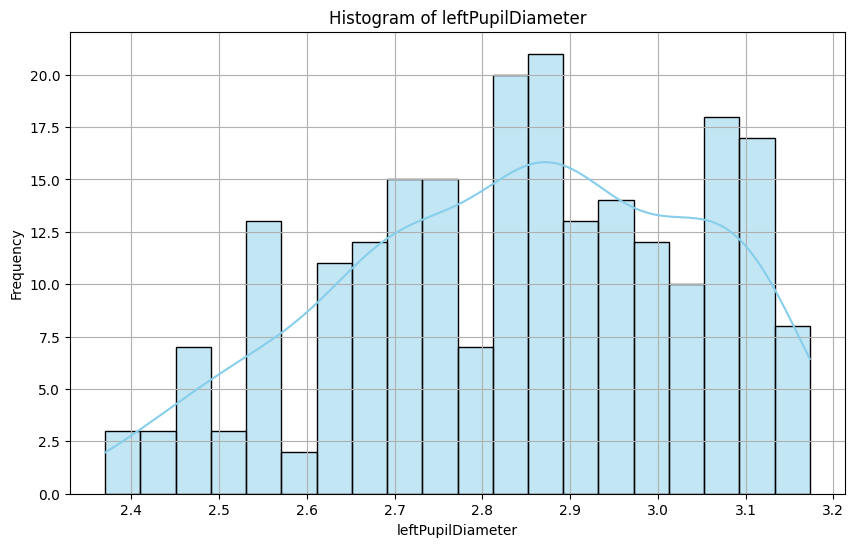

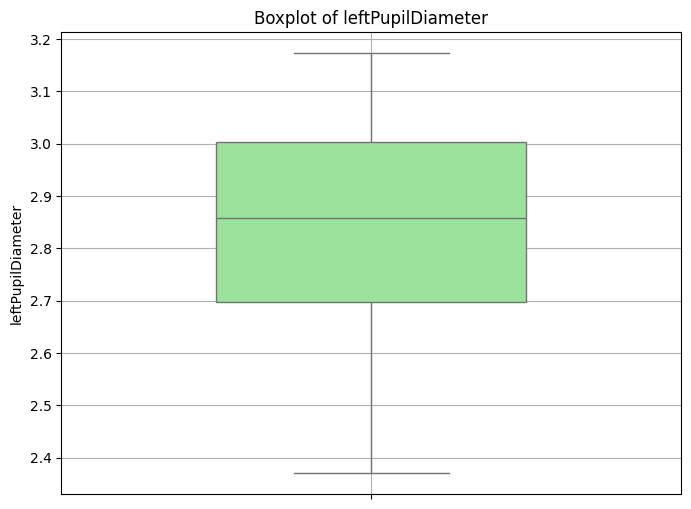

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


col_name = 'leftPupilDiameter'

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[col_name], kde=True, color='skyblue', bins=20)
plt.title(f'Histogram of {col_name}')
plt.xlabel(col_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[col_name], color='lightgreen', width=0.5)
plt.title(f'Boxplot of {col_name}')
plt.ylabel(col_name)
plt.grid(True)
plt.show()


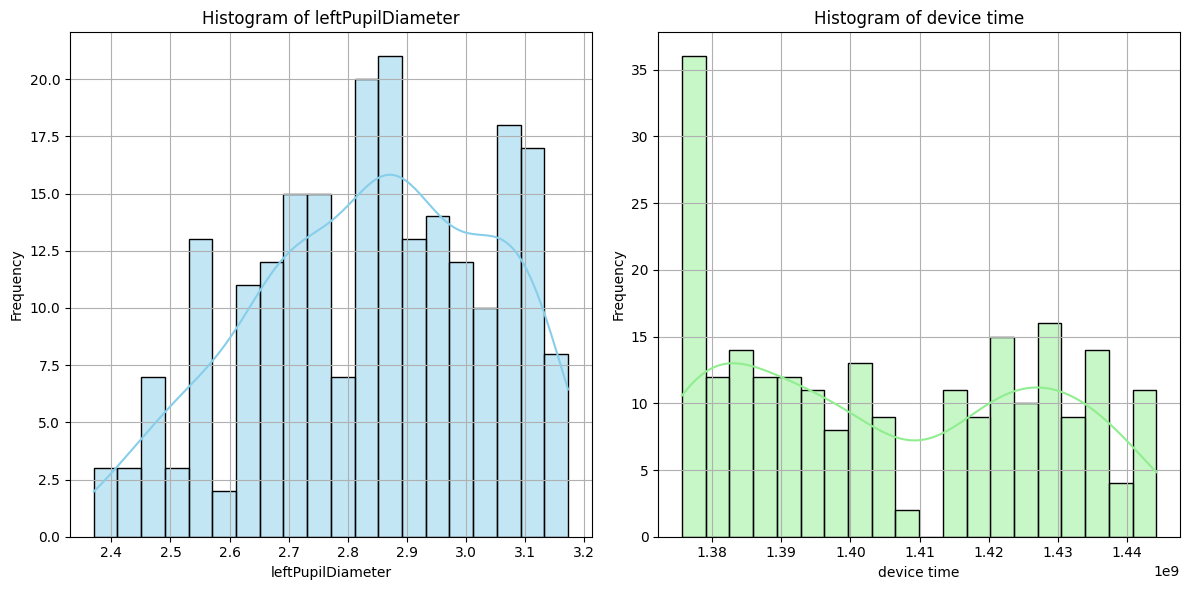

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


col1_name = 'leftPupilDiameter'
col2_name = 'device time'

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[col1_name], kde=True, color='skyblue', bins=20)
plt.title(f'Histogram of {col1_name}')
plt.xlabel(col1_name)
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(df[col2_name], kde=True, color='lightgreen', bins=20)
plt.title(f'Histogram of {col2_name}')
plt.xlabel(col2_name)
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()




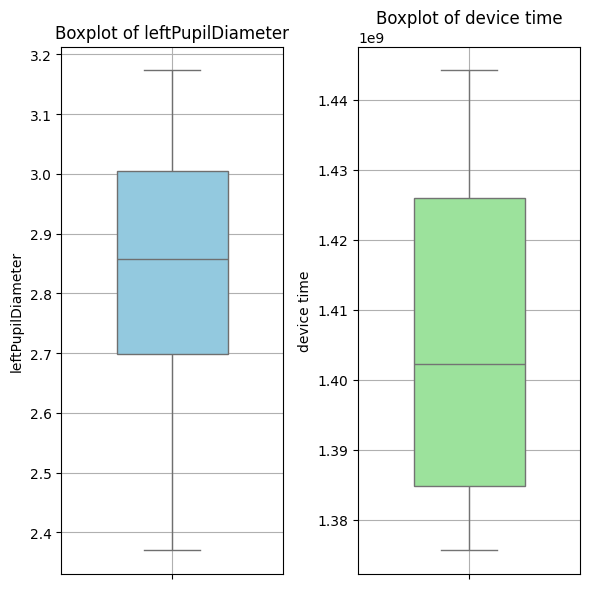

In [ ]:
# Plot boxplots
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df[col1_name], color='skyblue', width=0.5)
plt.title(f'Boxplot of {col1_name}')
plt.ylabel(col1_name)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(y=df[col2_name], color='lightgreen', width=0.5)
plt.title(f'Boxplot of {col2_name}')
plt.ylabel(col2_name)
plt.grid(True)

plt.tight_layout()
plt.show()

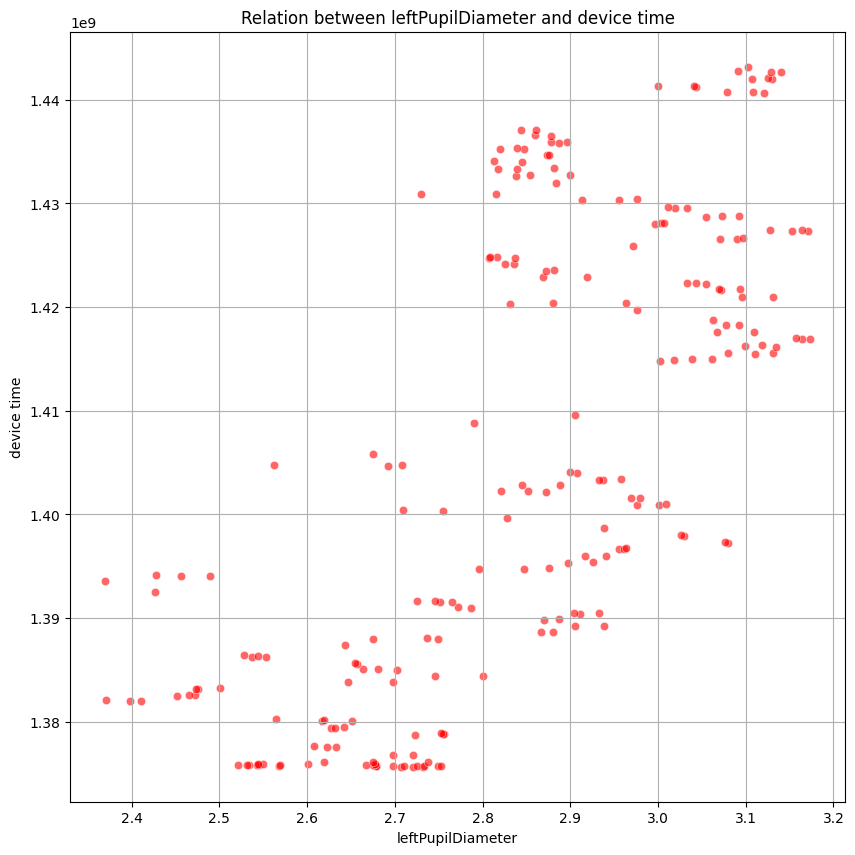

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df[col1_name], y=df[col2_name], color='red', alpha=0.6)
plt.title(f'Relation between {col1_name} and {col2_name}')
plt.xlabel(col1_name)
plt.ylabel(col2_name)
plt.grid(True)
plt.show()


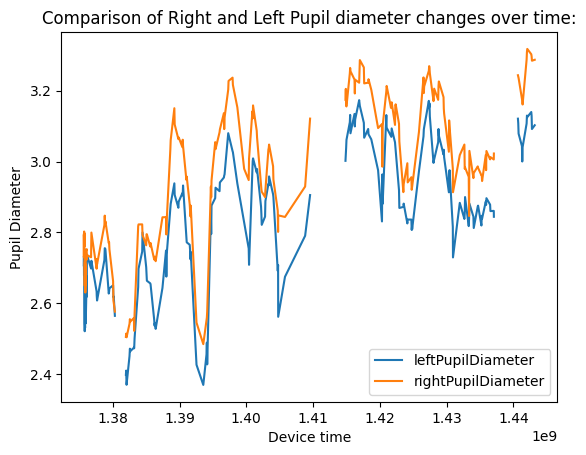

In [ ]:



col1 = 'leftPupilDiameter'
col2 = 'rightPupilDiameter'
col3 = 'device time'

# Plotting
plt.plot(df[col3], df[col1], label='leftPupilDiameter')
plt.plot(df[col3], df[col2], label='rightPupilDiameter')
plt.xlabel('Device time')
plt.ylabel('Pupil Diameter')
plt.title('Comparison of Right and Left Pupil diameter changes over time:')
plt.legend()
plt.show()


In [ ]:
# Load Excel file from Google Drive folder
file_path = '/content/drive/MyDrive/Colab Notebooks/excel/t6/t6_Cleaned1_hitmiss.xlsx'

#read excel data into a dataframe df
df = pd.read_excel(file_path)

# Display the loaded data
# print(df.head(100))

In [ ]:
df

,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
0,566450311461,experiment 1 type 1,16430520269,2.741562,2.832672,INVALID
1,566450319795,Display Block Title Starts...,16430528603,2.767929,2.821030,INVALID
2,566450321648,"blockType: Experiment 1.1, blockCounter: 1 ,tr...",0,0.000000,0.000000,INVALID
3,566451469799,Display Block Title Ends...,16431678610,2.736832,2.797516,INVALID
4,566451578125,Trial no. 1:\n,16431786936,2.754791,2.834274,INVALID
...,...,...,...,...,...,...
5106,566795147321,Total Time for trial : 4.4660\n,0,0.000000,0.000000,INVALID
5107,566795148186,Trial ends trial no: 5,0,0.000000,0.000000,INVALID
5108,566795148484,Blank screen starts after trial: 5,0,0.000000,0.000000,INVALID
5109,566796146534,Blank screen ends after trial: 5\n,16776355338,2.650650,2.749817,INVALID


In [ ]:
df.shape[0]

2116

In [ ]:
df.shape[0]

1378

In [ ]:
filtered_df.shape[0]

1378

In [ ]:
# Load Excel file from Google Drive folder
file_path = '/content/drive/MyDrive/Colab Notebooks/excel/nada/Nada_Cleaned2_hitmiss.xlsx'

#read excel data into a dataframe df
df = pd.read_excel(file_path)


In [ ]:
df.shape[0]

253

In [ ]:

import pandas as pd

# Find duplicated messages
duplicate_mask = df.duplicated(subset=['message'], keep='first')  # Mark duplicates keeping the first occurrence

# Filter the DataFrame to keep only the duplicated messages that start with "Grey cover at"
duplicate_indices = df[(duplicate_mask) & (df['message'].str.startswith(' Grey cover at '))].index

# Remove the duplicate rows
for index in duplicate_indices:
    df.drop([index - 2, index - 1, index, index + 1], inplace=True)


# Write the filtered DataFrame to Excel without duplicate rows and specified rows above/below the duplicates
df.to_excel('UNIQUE_Nada_Cleaned2_hitmiss.xlsx', index=False)



In [ ]:
df.shape[0]

253

In [ ]:
df.tail(1000)

,system time,message,device time,leftPupilDiameter,rightPupilDiameter,result
0,4842319420473,experiment 1 type 2,9806682929,3.118515,3.214661,INVALID
1,4842319445474,Display Block Title Starts...,9806707930,3.109482,3.243256,INVALID
2,4842319447647,"blockType: Experiment 2.1, blockCounter: 2 ,tr...",0,0.000000,0.000000,INVALID
3,4842320470490,Display Block Title Ends...,9807732937,2.990631,3.195129,INVALID
4,4842320528825,Trial start Trial no. 1:\n,9807791271,3.008286,3.194107,INVALID
...,...,...,...,...,...,...
248,4842469056743,Trial ends trial no: 5,0,0.000000,0.000000,INVALID
249,4842469057340,Blank screen starts after trial: 5,0,0.000000,0.000000,INVALID
250,4842470064195,Blank screen ends after trial: 5\n,9957325358,3.224594,3.370773,INVALID
251,4842470080861,Block has ended. Please be ready for next block.,9957342024,3.239838,3.374725,INVALID


In [ ]:
import pandas as pd


# Dictionary to store DataFrames for each participant
participant_data = {}

# Load data from each Excel sheet into a separate DataFrame
for participant_id in range(0, 10):
    # Construct the file path for the Excel sheet of the current participant
    file_path = f'/content/drive/MyDrive/Colab Notebooks/excel/t{participant_id}/UNIQUE_t{participant_id}_Cleaned1_hitmiss_mean.xlsx'
    # print(file_path)

    # Read the Excel sheet into a DataFrame and store it in the dictionary
    participant_data[participant_id] = pd.read_excel(file_path)



In [ ]:
import matplotlib.pyplot as plt
# # Plot column comparisons between participants
# for column in participant_data[0].columns:  # Assuming all participants have the same columns
#     plt.figure(figsize=(10, 6))
#     for participant_id, df in participant_data.items():
#         plt.plot(df['Trial'], df[column], label=f'Participant {participant_id}')
#     plt.title(f'{column} Comparison Between Participants')
#     plt.xlabel('Trial')
#     plt.ylabel(column)
#     plt.legend()
#     plt.grid(True)
#     plt.show()




In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Dictionary to store DataFrames for each participant
# participant_data = {}

# # Load data from each Excel sheet into a separate DataFrame
# for participant_id in range(0, 10):
#     # Construct the file path for the Excel sheet of the current participant
#     file_path = f'/content/drive/MyDrive/Colab Notebooks/excel/t{participant_id}/UNIQUE_t{participant_id}_Cleaned1_hitmiss_mean.xlsx'

#     # Read the Excel sheet into a DataFrame and store it in the dictionary
#     participant_data[participant_id] = pd.read_excel(file_path)

# # Concatenate the data from all participants into a single DataFrame
# combined_df = pd.concat(participant_data.values(), ignore_index=True)

# # Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined
# plt.figure(figsize=(6, 4))
# for participant_id, df in participant_data.items():
#     plt.plot(df['Total Time'], df['Mean L pupil diameter'], label=f'Participant {participant_id}')
# plt.title('Change in Mean L Pupil Diameter Across Total Time (All Participants Combined)')
# plt.xlabel('Total Time')
# plt.ylabel('Mean L pupil diameter')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store DataFrames for each participant
participant_data = {}

# Load data from each Excel sheet into a separate DataFrame
for participant_id in range(0, 10):
    # Construct the file path for the Excel sheet of the current participant
    file_path = f'/content/drive/MyDrive/Colab Notebooks/excel/t{participant_id}/UNIQUE_t{participant_id}_Cleaned1_hitmiss_mean.xlsx'

    # Read the Excel sheet into a DataFrame and store it in the dictionary
    participant_data[participant_id] = pd.read_excel(file_path)

# Concatenate the data from all participants into a single DataFrame
combined_df = pd.concat(participant_data.values(), ignore_index=True)



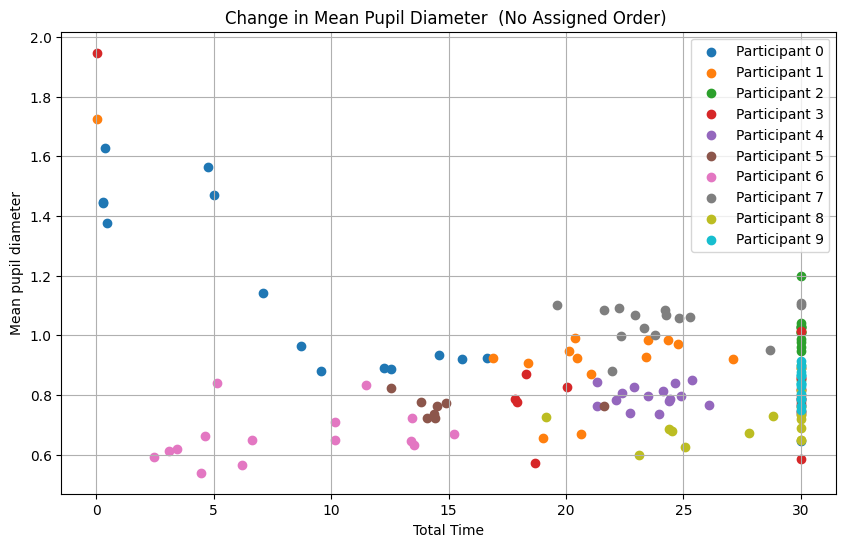

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['Mean L pupil diameter'], label=f'Participant {participant_id}')
plt.title('Change in Mean Pupil Diameter  (No Assigned Order) ')
plt.xlabel('Total Time')
plt.ylabel('Mean pupil diameter')
plt.legend()
plt.grid(True)
plt.show()


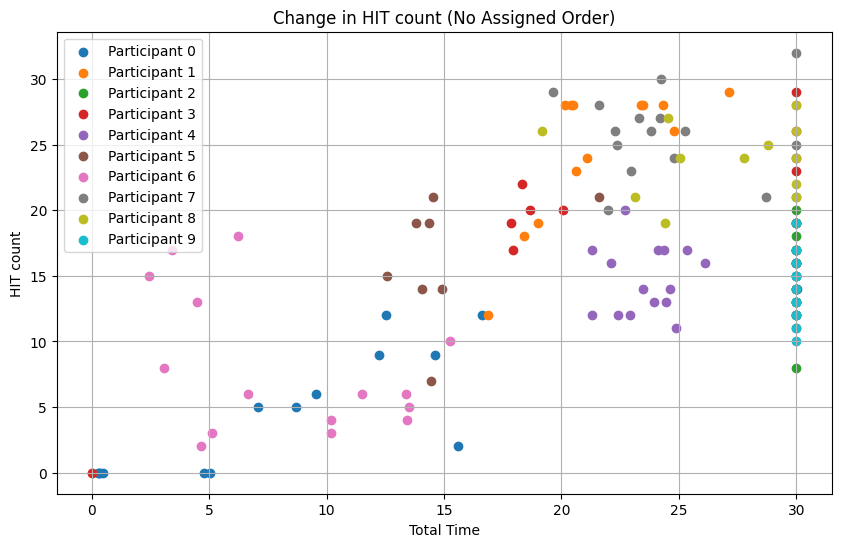

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['HIT count'], label=f'Participant {participant_id}')
plt.title('Change in HIT count (No Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('HIT count')
plt.legend()
plt.grid(True)
plt.show()


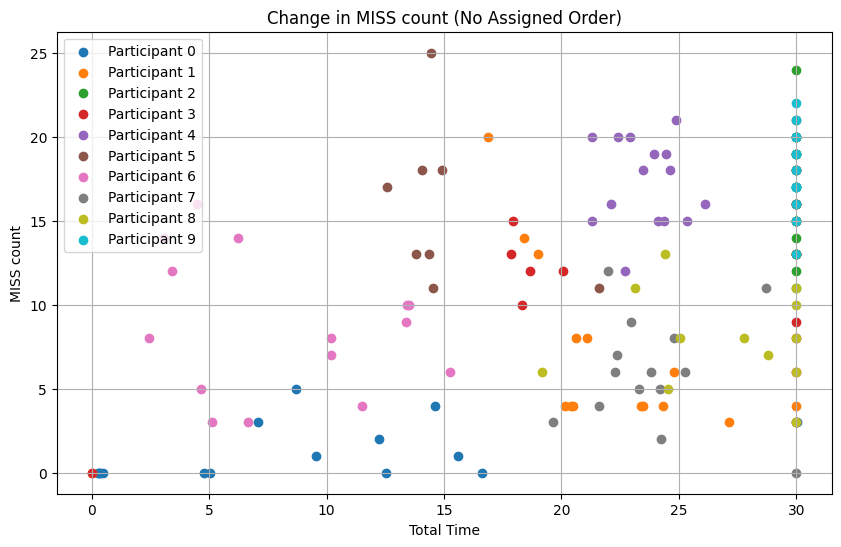

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['MISS count'], label=f'Participant {participant_id}')
plt.title('Change in MISS count (No Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('MISS count')
plt.legend()
plt.grid(True)
plt.show()

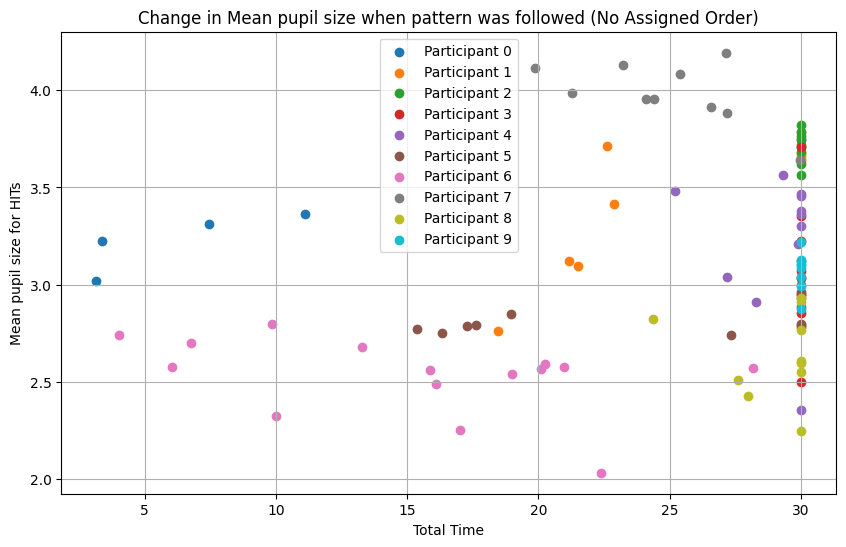

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['Mean pupil size for HITs'], label=f'Participant {participant_id}')
plt.title('Change in Mean pupil size when pattern was followed (No Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('Mean pupil size for HITs')
plt.legend()
plt.grid(True)
plt.show()

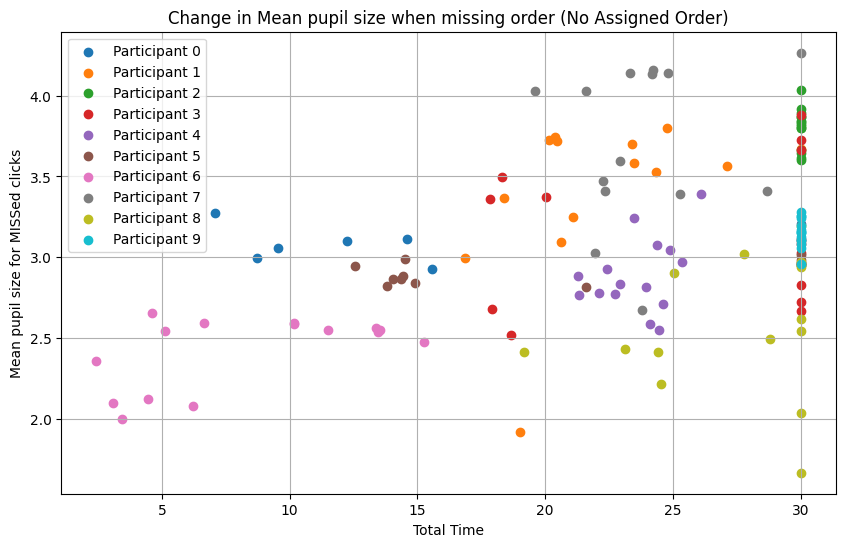

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['Mean pupil size for MISS'], label=f'Participant {participant_id}')
plt.title('Change in Mean pupil size when missing order (No Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('Mean pupil size for MISSed clicks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store DataFrames for each participant
participant_data = {}

# Load data from each Excel sheet into a separate DataFrame
for participant_id in range(0, 10):
    # Construct the file path for the Excel sheet of the current participant
    file_path = f'/content/drive/MyDrive/Colab Notebooks/excel/t{participant_id}/UNIQUE_t{participant_id}_Cleaned2_hitmiss_mean.xlsx'

    # Read the Excel sheet into a DataFrame and store it in the dictionary
    participant_data[participant_id] = pd.read_excel(file_path)

# Concatenate the data from all participants into a single DataFrame
combined_df = pd.concat(participant_data.values(), ignore_index=True)


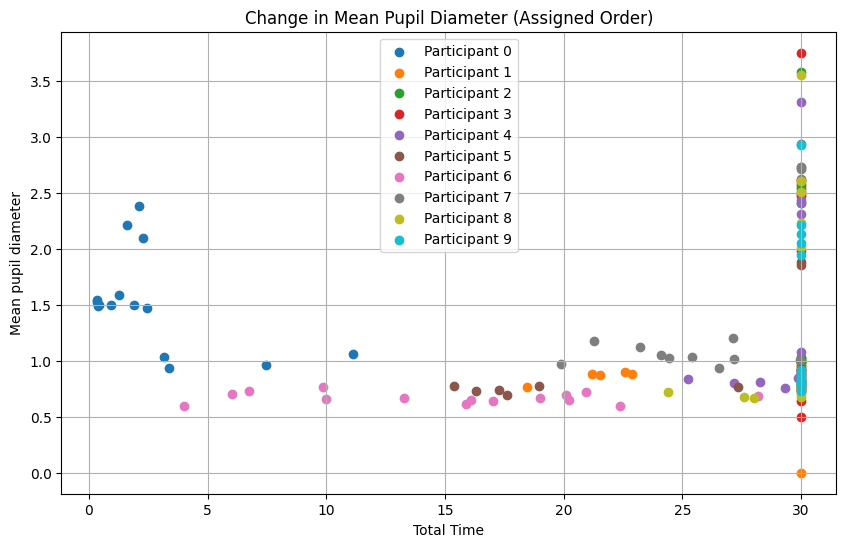

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['Mean L pupil diameter'], label=f'Participant {participant_id}')
plt.title('Change in Mean Pupil Diameter (Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('Mean pupil diameter')
plt.legend()
plt.grid(True)
plt.show()


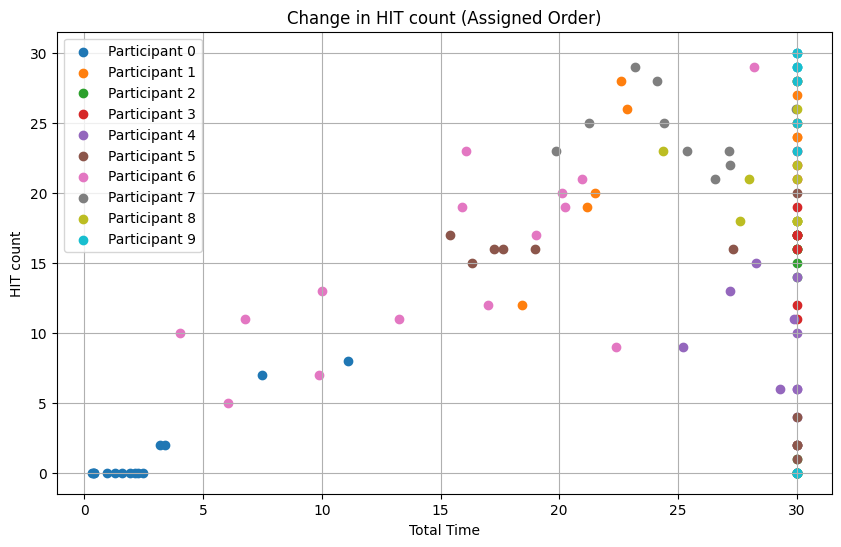

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['HIT count'], label=f'Participant {participant_id}')
plt.title('Change in HIT count (Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('HIT count')
plt.legend()
plt.grid(True)
plt.show()


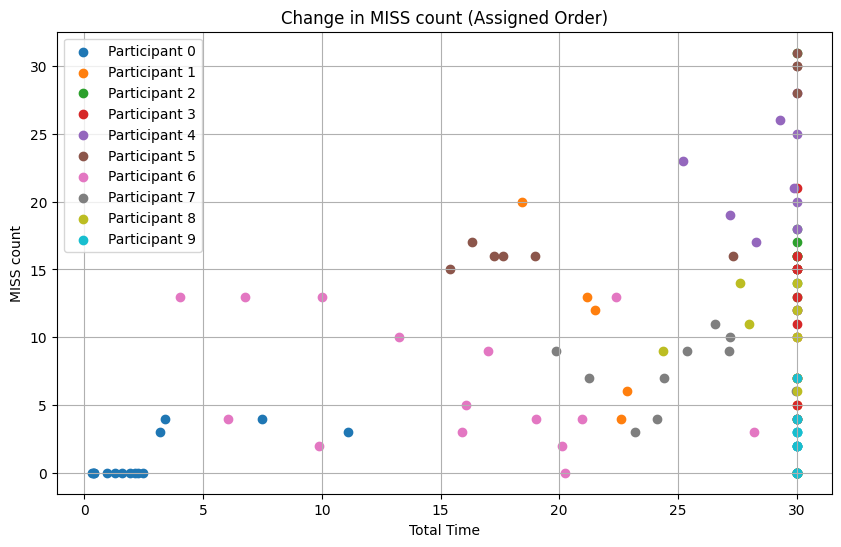

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['MISS count'], label=f'Participant {participant_id}')
plt.title('Change in MISS count (Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('MISS count')
plt.legend()
plt.grid(True)
plt.show()

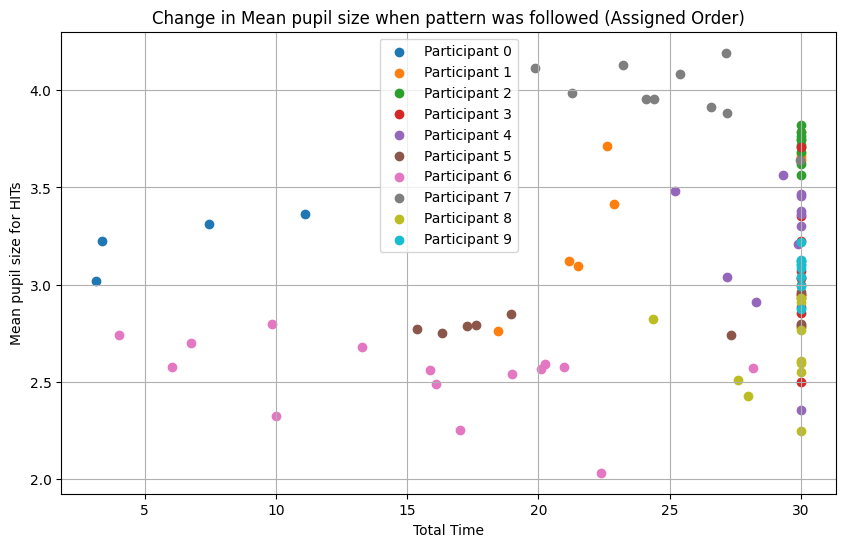

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['Mean pupil size for HITs'], label=f'Participant {participant_id}')
plt.title('Change in Mean pupil size when pattern was followed (Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('Mean pupil size for HITs')
plt.legend()
plt.grid(True)
plt.show()

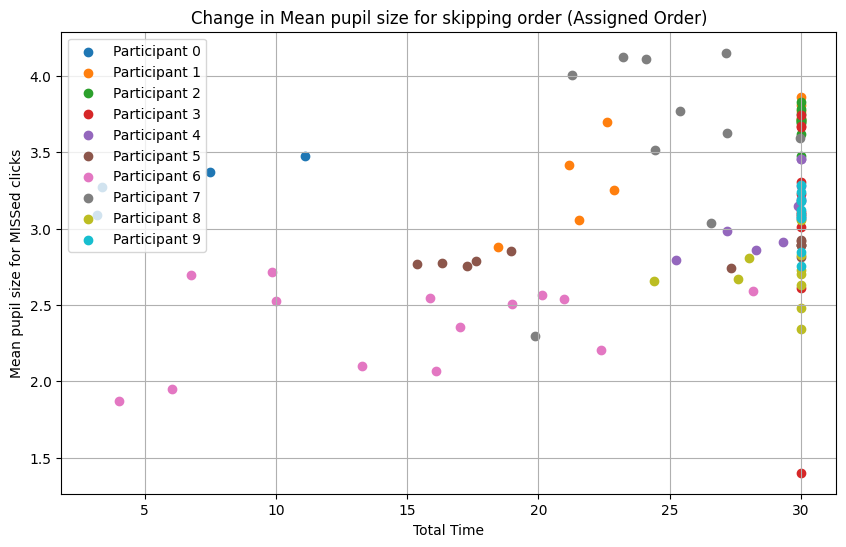

In [ ]:
# Plot the change in 'Mean L pupil diameter' across 'Total Time' for all participants combined using a scatter plot
plt.figure(figsize=(10, 6))
for participant_id, df in participant_data.items():
    plt.scatter(df['Total Time'], df['Mean pupil size for MISS'], label=f'Participant {participant_id}')
plt.title('Change in Mean pupil size for skipping order (Assigned Order)')
plt.xlabel('Total Time')
plt.ylabel('Mean pupil size for MISSed clicks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#   # Print each participant's DataFrame
# for participant_id, df in participant_data.items():
#     print(f"Participant {participant_id} DataFrame:")
#     print(df)
#     print()
#     print()  # Add an empty line between DataFrames for clarity

# CS298_final_analysis_average_no_order1

### **ALl consolidated average plots below:**

---



> Add blockquote

> Add blockquote





In [ ]:
df1

,Subject,Mean L pupil diameter,HIT count,MISS count,Mean pupil size for HITs,Mean pupil size for MISS,Total Time
0,t0,1.410323,4.9333,1.2666,3.108516,3.095969,9.210027
1,t1,0.960600,23.1300,6.6600,3.395000,3.404000,20.670000
2,t2,1.000000,15.6660,16.3330,3.792000,3.800000,30.002000
3,t3,0.876000,18.8660,11.0000,3.250000,3.153000,24.188000
4,t4,0.794000,14.7330,17.2660,3.032000,2.890000,23.600000
5,t5,0.764000,15.3300,16.6600,2.924000,2.930000,22.010000
6,t6,0.662000,8.0000,8.6000,2.491000,2.420000,8.230000
7,t7,1.045000,25.9300,5.8000,3.921000,3.704000,24.340000
8,t8,0.707000,22.5300,9.4000,2.677000,2.587000,27.520000
9,t9,0.834000,14.2600,17.7300,3.121000,3.152000,30.002000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/excel/final_analysis/average_no_order_exp1.xlsx'

#read excel data into a dataframe df
df1 = pd.read_excel(file_path)

# plt.figure(figsize=(10, 6))

# plt.scatter(df1['Total Time'], df1['Subject'], label=f'Time taken for Subjects')
# plt.title('Pattern of time taken by all participants (No Order)')
# plt.xlabel('Total Time')
# plt.ylabel('Participant')
# plt.legend()
# plt.grid(True)
# plt.show()





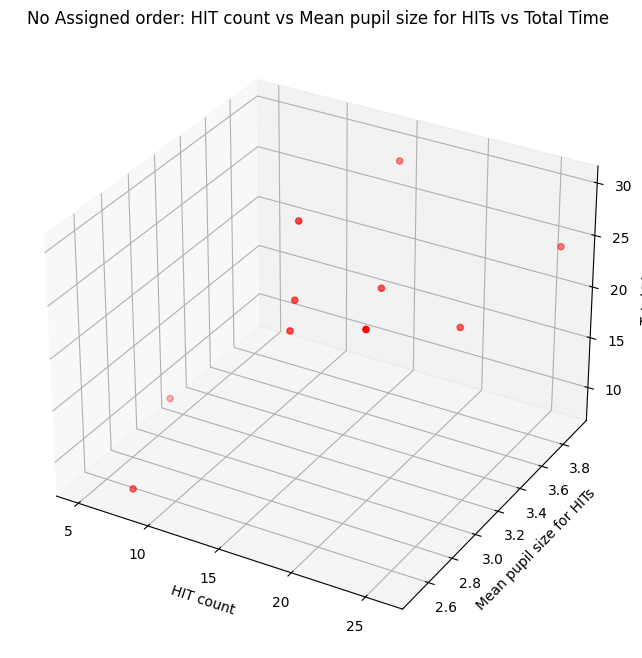

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Specify column names
col_name1 = 'HIT count'
col_name2 = 'Mean pupil size for HITs'
col_name3 = 'Total Time'

# Create a figure and axis objects
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter plot
ax.scatter(df1[col_name1], df1[col_name2], df1[col_name3], color='red')

# Set labels and title
ax.set_xlabel(col_name1)
ax.set_ylabel(col_name2)
ax.set_zlabel(col_name3)
ax.set_title(f'No Assigned order: {col_name1} vs {col_name2} vs {col_name3}')

plt.show()


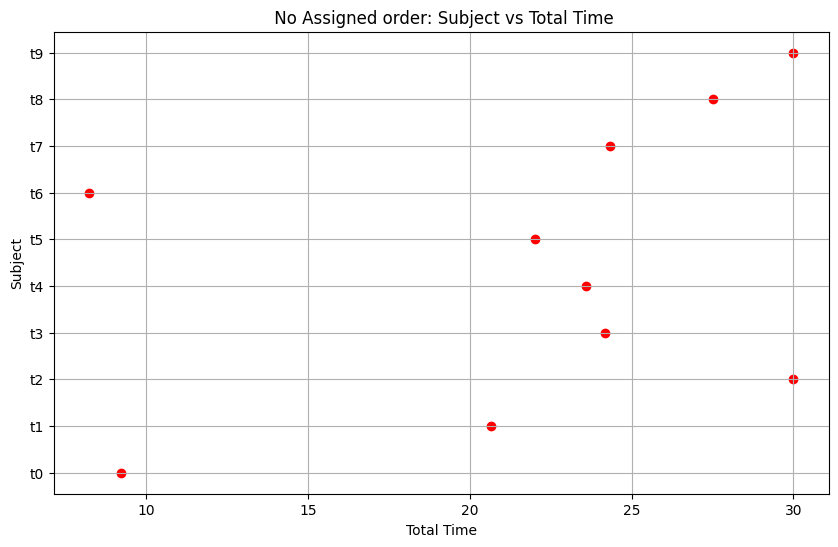

In [ ]:
col_name1 = 'Total Time'
col_name2 = 'Subject'

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1[col_name1], df1[col_name2], color='red')
plt.title(f' No Assigned order: {col_name2} vs {col_name1}')
plt.xlabel(col_name1)
plt.ylabel(col_name2)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/excel/final_analysis/average_defined_order_exp2.xlsx'

#read excel data into a dataframe df
df2 = pd.read_excel(file_path)

# plt.figure(figsize=(10, 6))

# plt.scatter(df2['Total Time'], df2['Subject'], label=f'Time taken for Subjects')
# plt.title('Pattern of time taken by all participants (No Order)')
# plt.xlabel('Total Time')
# plt.ylabel('Participant')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# Specify column names
col_name1 = 'HIT count'
col_name2 = 'Mean pupil size for HITs'
col_name3 = 'Total Time'

# Create a figure and axis objects
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter plot
ax.scatter(df[col_name1], df[col_name2], df[col_name3], color='red')

# Set labels and title
ax.set_xlabel(col_name1)
ax.set_ylabel(col_name2)
ax.set_zlabel(col_name3)
ax.set_title(f'No Assigned order: {col_name1} vs {col_name2} vs {col_name3}')

plt.show()


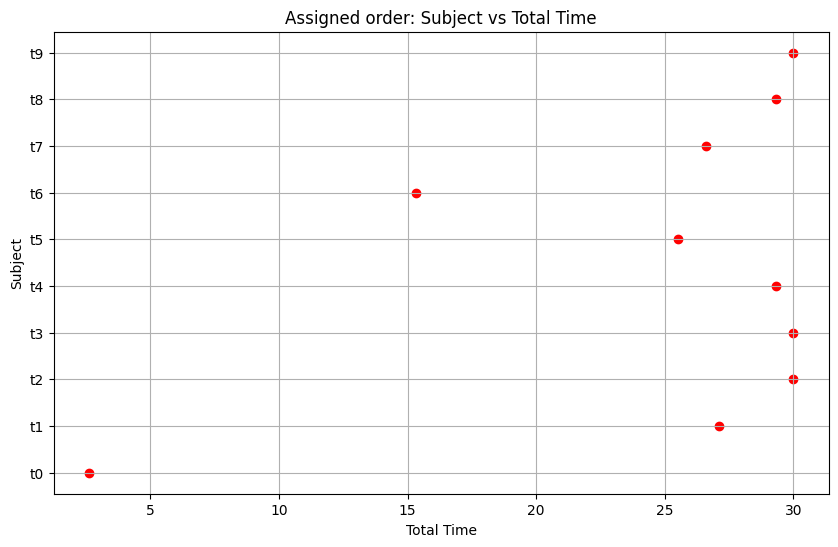

In [ ]:
col_name1 = 'Total Time'
col_name2 = 'Subject'

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2[col_name1], df2[col_name2], color='red')
plt.title(f'Assigned order: {col_name2} vs {col_name1}')
plt.xlabel(col_name1)
plt.ylabel(col_name2)
plt.grid(True)
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))

plt.scatter(df1['Total Time'], df1['Subject'], label=f'Time taken for Subjects', color='red')
plt.title('Pattern of time taken by all participants (No Order)')
plt.xlabel('Total Time')
plt.ylabel('Participant')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

plt.scatter(df2['Total Time'], df2['Subject'], label=f'Time taken for Subjects', color='red')
plt.title('Pattern of time taken by all participants (No Order)')
plt.xlabel('Total Time')
plt.ylabel('Participant')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df1.describe()

,Mean L pupil diameter,HIT count,MISS count,Mean pupil size for HITs,Mean pupil size for MISS,Total Time
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.905292,16.337830,11.071560,3.171152,3.113597,21.977203
std,0.216898,6.589727,5.714656,0.446931,0.440893,7.647203
min,0.662000,4.933300,1.266600,2.491000,2.420000,8.230000
25%,0.771500,14.378250,7.145000,2.951000,2.900000,21.005000
50%,0.855000,15.498000,10.200000,3.114758,3.123984,23.894000
75%,0.990150,21.614000,16.578250,3.358750,3.341250,26.725000
max,1.410323,25.930000,17.730000,3.921000,3.800000,30.002000


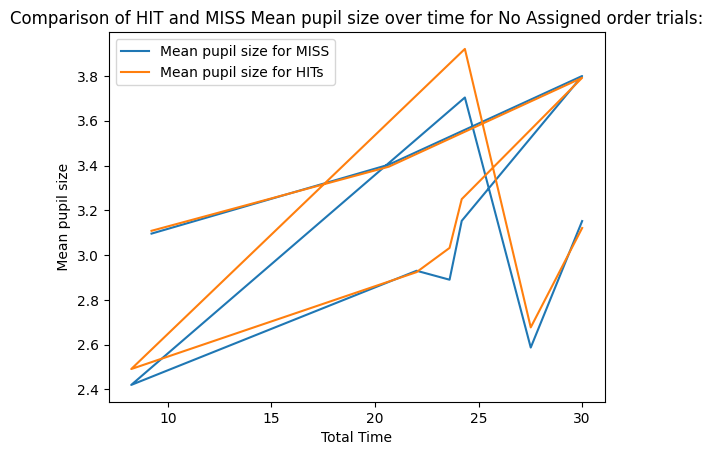

In [ ]:

col1 = 'Mean pupil size for MISS'
col2 = 'Mean pupil size for HITs'
col3 = 'Total Time'

# Plotting
plt.plot(df1[col3], df1[col1], label='Mean pupil size for MISS')
plt.plot(df1[col3], df1[col2], label='Mean pupil size for HITs')
plt.xlabel('Total Time')
plt.ylabel(' Mean pupil size ')
plt.title('Comparison of HIT and MISS Mean pupil size over time for No Assigned order trials:')
plt.legend()
plt.show()


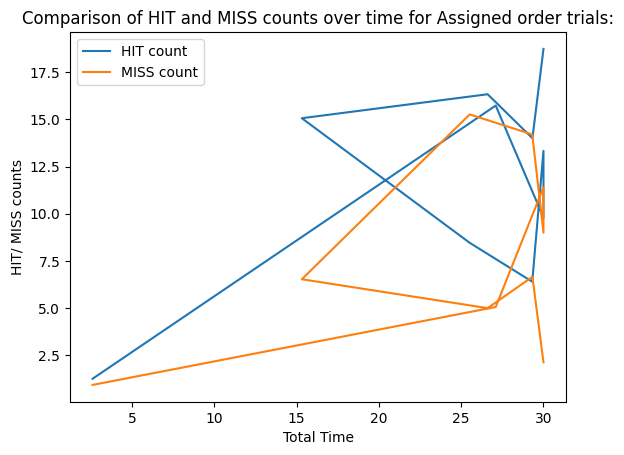

In [ ]:

col1 = 'HIT count'
col2 = 'MISS count'
col3 = 'Total Time'

# Plotting
plt.plot(df2[col3], df2[col1], label='HIT count')
plt.plot(df2[col3], df2[col2], label='MISS count')
plt.xlabel('Total Time')
plt.ylabel('HIT/ MISS counts')
plt.title('Comparison of HIT and MISS counts over time for Assigned order trials:')
plt.legend()
plt.show()


In [ ]:
df1

,Subject,Mean L pupil diameter,HIT count,MISS count,Mean pupil size for HITs,Mean pupil size for MISS,Total Time
0,t0,1.410323,4.9333,1.2666,3.108516,3.095969,9.210027
1,t1,0.960600,23.1300,6.6600,3.395000,3.404000,20.670000
2,t2,1.000000,15.6660,16.3330,3.792000,3.800000,30.002000
3,t3,0.876000,18.8660,11.0000,3.250000,3.153000,24.188000
4,t4,0.794000,14.7330,17.2660,3.032000,2.890000,23.600000
5,t5,0.764000,15.3300,16.6600,2.924000,2.930000,22.010000
6,t6,0.662000,8.0000,8.6000,2.491000,2.420000,8.230000
7,t7,1.045000,25.9300,5.8000,3.921000,3.704000,24.340000
8,t8,0.707000,22.5300,9.4000,2.677000,2.587000,27.520000
9,t9,0.834000,14.2600,17.7300,3.121000,3.152000,30.002000


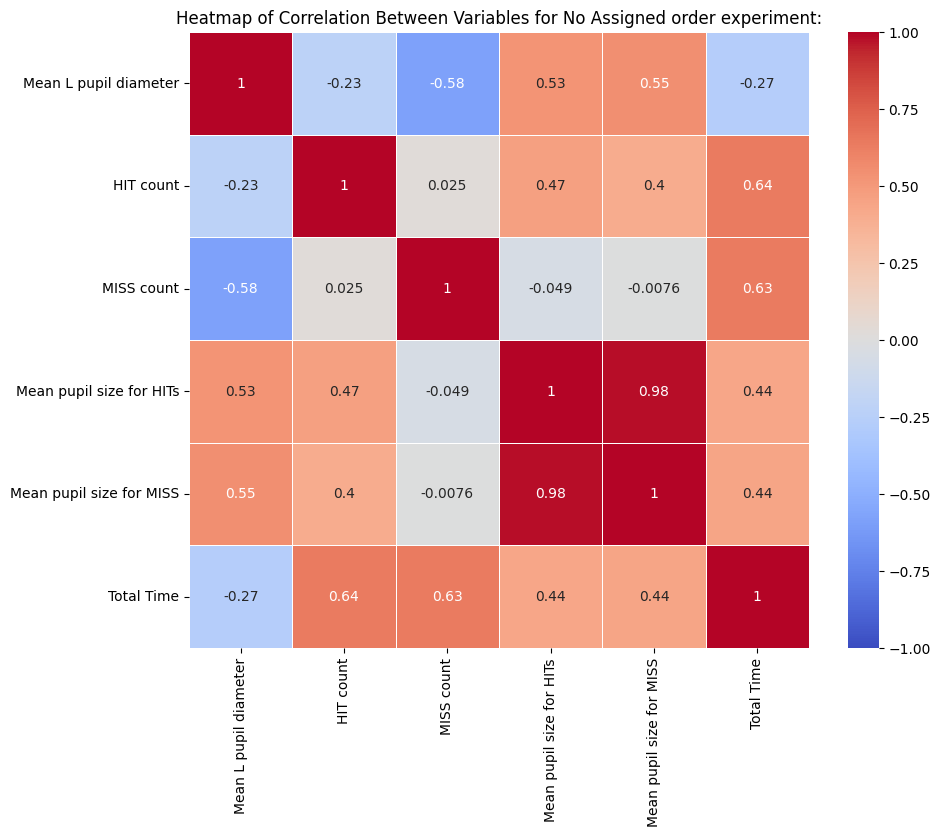

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
# data = {
#     'Subject': ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9'],
#     'Mean L pupil diameter': [1.410323, 0.960600, 1.000000, 0.876000, 0.794000, 0.764000, 0.662000, 1.045000, 0.707000, 0.834000],
#     'HIT count': [4.9333, 23.1300, 15.6660, 18.8660, 14.7330, 15.3300, 8.0000, 25.9300, 22.5300, 14.2600],
#     'MISS count': [1.2666, 6.6600, 16.3330, 11.0000, 17.2660, 16.6600, 8.6000, 5.8000, 9.4000, 17.7300],
#     'Mean pupil size for HITs': [3.108516, 3.395000, 3.792000, 3.250000, 3.032000, 2.924000, 2.491000, 3.921000, 2.677000, 3.121000],
#     'Mean pupil size for MISS': [3.095969, 3.404000, 3.800000, 3.153000, 2.890000, 2.930000, 2.420000, 3.704000, 2.587000, 3.152000],
#     'Total Time': [9.210027, 20.670000, 30.002000, 24.188000, 23.600000, 22.010000, 8.230000, 24.340000, 27.520000, 30.002000]
# }

# Create DataFrame
# df = pd.DataFrame(data)

# Drop the 'Subject' column for correlation matrix
df_numeric = df1.drop('Subject', axis=1)

# Calculate correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap of Correlation Between Variables for No Assigned order experiment:')
plt.show()


In [ ]:
df2

,Subject,Mean L pupil diameter,HIT count,MISS count,Mean pupil size for HITs,Mean pupil size for MISS,Total Time
0,t0,1.519,1.26,0.933,3.22,3.30,2.610
1,t1,1.163,15.73,5.060,3.45,3.51,27.100
2,t2,1.560,9.80,11.400,3.71,3.69,30.001
3,t3,1.310,13.33,9.000,3.04,3.08,30.002
4,t4,1.320,6.40,14.200,3.22,3.12,29.320
5,t5,0.990,8.46,15.260,2.83,2.83,25.520
6,t6,0.660,15.06,6.530,2.53,2.37,15.322
7,t7,1.610,16.33,5.000,3.98,3.62,26.610
8,t8,1.340,14.00,6.660,2.63,2.68,29.330
9,t9,1.290,18.73,2.133,3.07,3.08,30.002


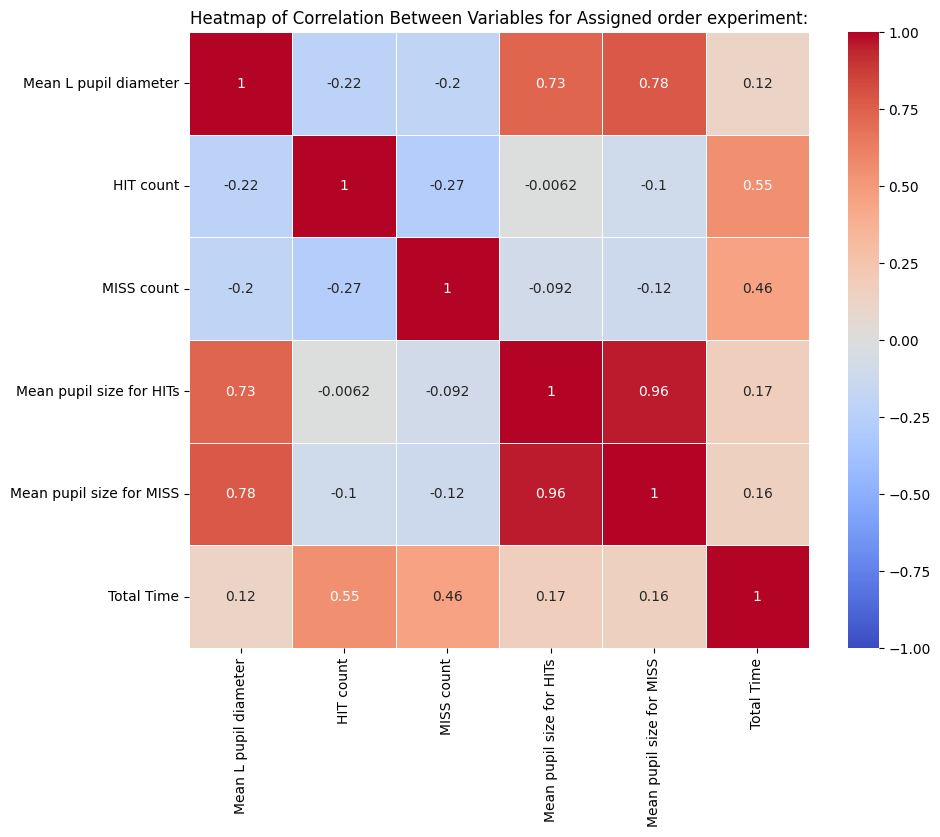

In [ ]:
# Drop the 'Subject' column for correlation matrix
df_numeric = df2.drop('Subject', axis=1)

# Calculate correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Heatmap of Correlation Between Variables for Assigned order experiment:')
plt.show()
